# Анализ анкет  и план дествий по удержанию  клиентов фитнес-центров «Культурист-датасаентист»

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')


## Обзор файлов

 Oтдел по работе с клиентами «Культуриста-датасаентиста» для анализа предоставил файл с анкетами клиентов и данными на месяц до оттока и факт оттока на определённый месяц.

- 'Churn' — факт оттока в текущем месяце;
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

In [2]:
gym_churn = pd.read_csv('gym_churn.csv')

In [3]:
gym_churn.head() 

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


По info() видно, что пропущенных значений нет, на дубли проверять смысла нет, т.к. в таком файле они вполне допустимы и объяснимы.

In [5]:
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Среднестатический клиент: 29 лет, живущий или работающий в районе фитнес-центра,приобретающий абонемет не менее, чем на 4 месяца, не очень любящий групповые занятия, поьзующийся дополнительными услугами почти на 150 условных тугриков в месяц,являющийся постоянным клиентом более 3 месяцев, посещает центр 1-2 раза в неделю. Среди клиентов практически одинаковое количество мужчин и женщин.

Поделим  признаки  по 'Churn' и сравним

In [6]:
groupped_churn = gym_churn.pivot_table(index='Churn',values=['gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month']).round(2)
groupped_churn

,Age,Avg_additional_charges_total,Avg_class_frequency_current_month,Avg_class_frequency_total,Contract_period,Group_visits,Lifetime,Month_to_end_contract,Near_Location,Partner,Phone,Promo_friends,gender
Churn,,,,,,,,,,,,,
0,29.98,158.45,2.03,2.02,5.75,0.46,4.71,5.28,0.87,0.53,0.9,0.35,0.51
1,26.99,115.08,1.04,1.47,1.73,0.27,0.99,1.66,0.77,0.36,0.9,0.18,0.51


Как видно, практически по всем позициям среднее по строке "отток" меньше чем, у остальных. Так средний возраст меньше на 3 года, расходы на доп.услуги меньше в 1.3 раза, уменьшилась частота посещения центра в неделю, длительность абонемента  в 3 раза и посещение групповых занятий почти в 2 раза меньше, чем у постоянных клиентов; небольшой срок посещения центра 1 мес против 4.7 у постоянных клиентов. Не показывают большой разницы место проживания/работы, партнерство, пол.

Для наглядности посмотрим графически относительную разницу. (Признак 'Avg_additional_charges_total' переведем в масштаб 1:10)

In [7]:
groupped_churn['Avg_additional_charges_total'] = groupped_churn['Avg_class_frequency_total']/0.1
features = groupped_churn.T

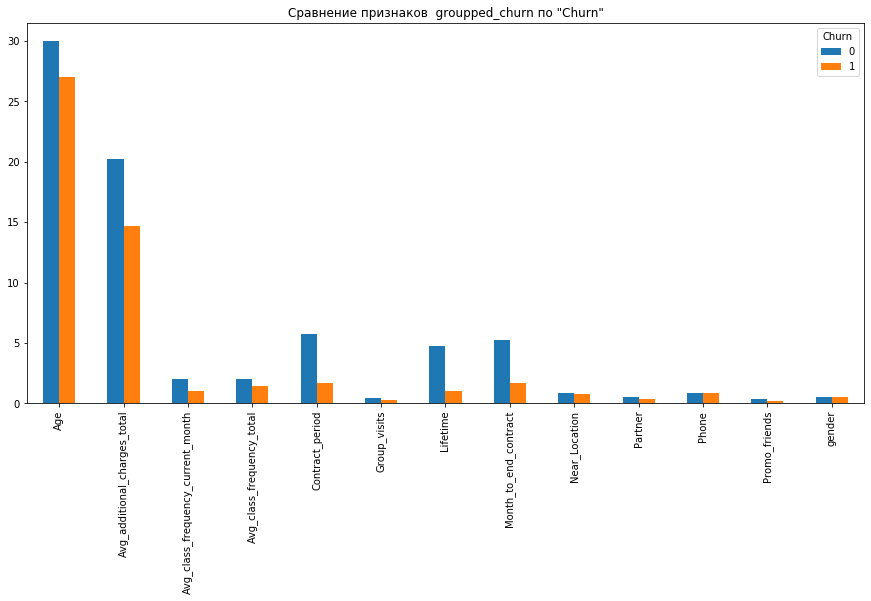

In [8]:
features.plot.bar(rot=90,figsize=(15,7), title = 'Сравнение признаков  groupped_churn по "Churn"'  )  

Посмотрим сравнительные гистограммы признаков

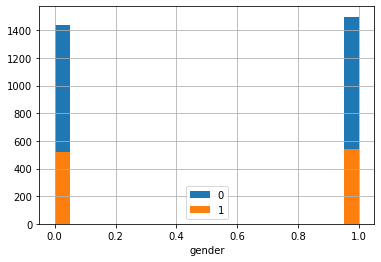

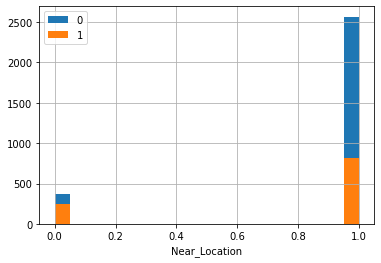

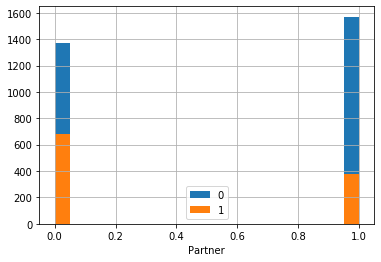

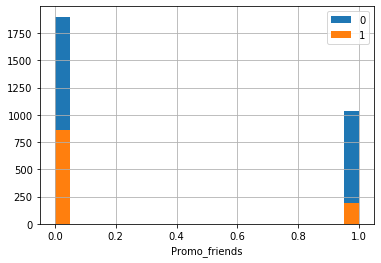

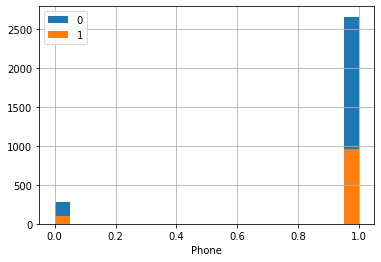

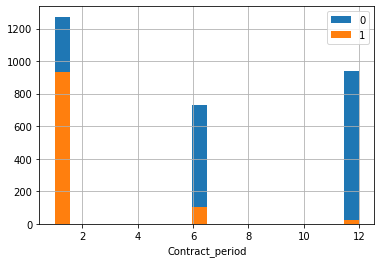

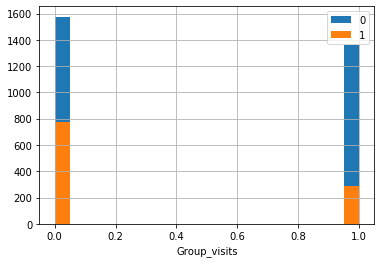

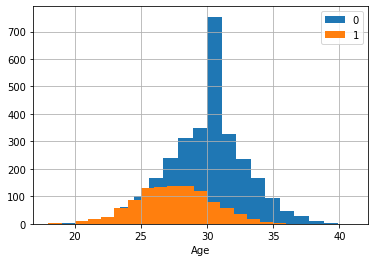

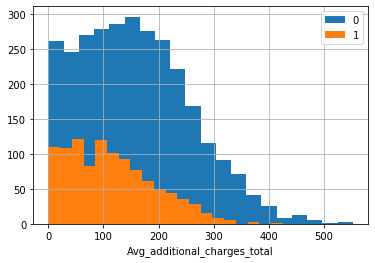

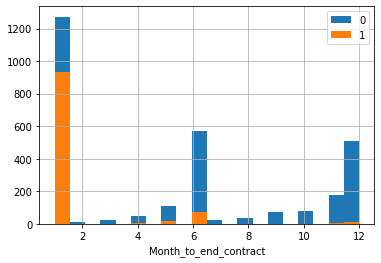

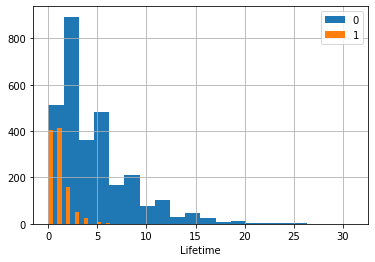

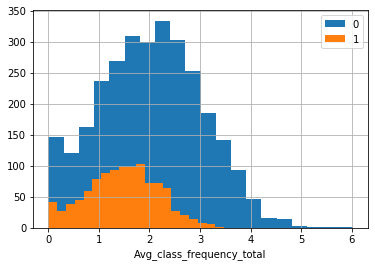

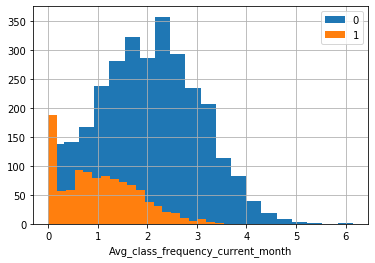

In [9]:
churn0 = gym_churn.query('Churn=="0"')
churn1 = gym_churn.query('Churn=="1"')
for feature in churn0.drop('Churn', axis = 1).columns:
    churn0.drop('Churn', axis = 1)[feature].hist(bins=20,label='0')
    churn1.drop('Churn', axis = 1)[feature].hist(bins=20,label='1')
    plt.legend();
    plt.xlabel(feature)
    plt.show()
    

  Столбчатые гистограммы и распределения признаков

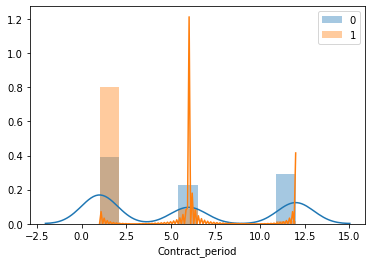

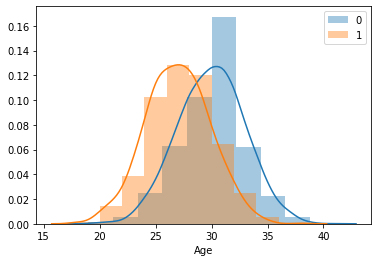

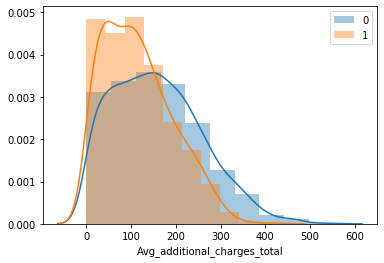

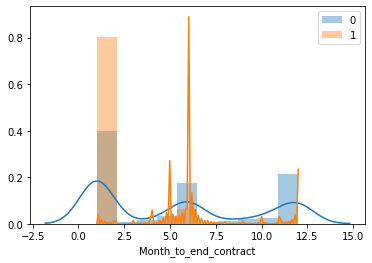

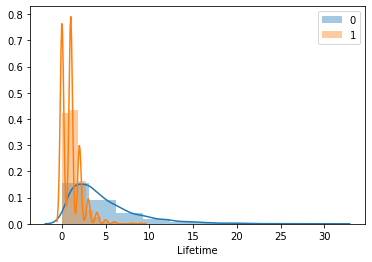

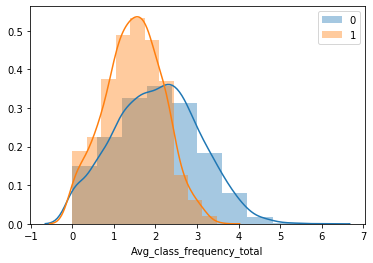

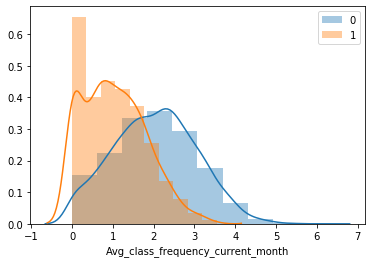

In [10]:
churn0 = gym_churn.query('Churn=="0"')
churn1 = gym_churn.query('Churn=="1"')
for feature in churn0.drop(columns=['Churn','gender','Near_Location','Partner','Promo_friends','Phone','Group_visits'], axis = 1).columns:
    sns.distplot(churn0.drop(columns=['Churn','gender','Near_Location','Partner','Promo_friends','Phone','Group_visits'], axis = 1)[feature], bins=10,label='0')
    sns.distplot(churn1.drop(columns=['Churn','gender','Near_Location','Partner','Promo_friends','Phone','Group_visits'], axis = 1)[feature], bins=10,label='1')
    plt.legend();
    plt.xlabel(feature)
    plt.show() 


Сформируем матрицу корреляции и тепловую карту по ней

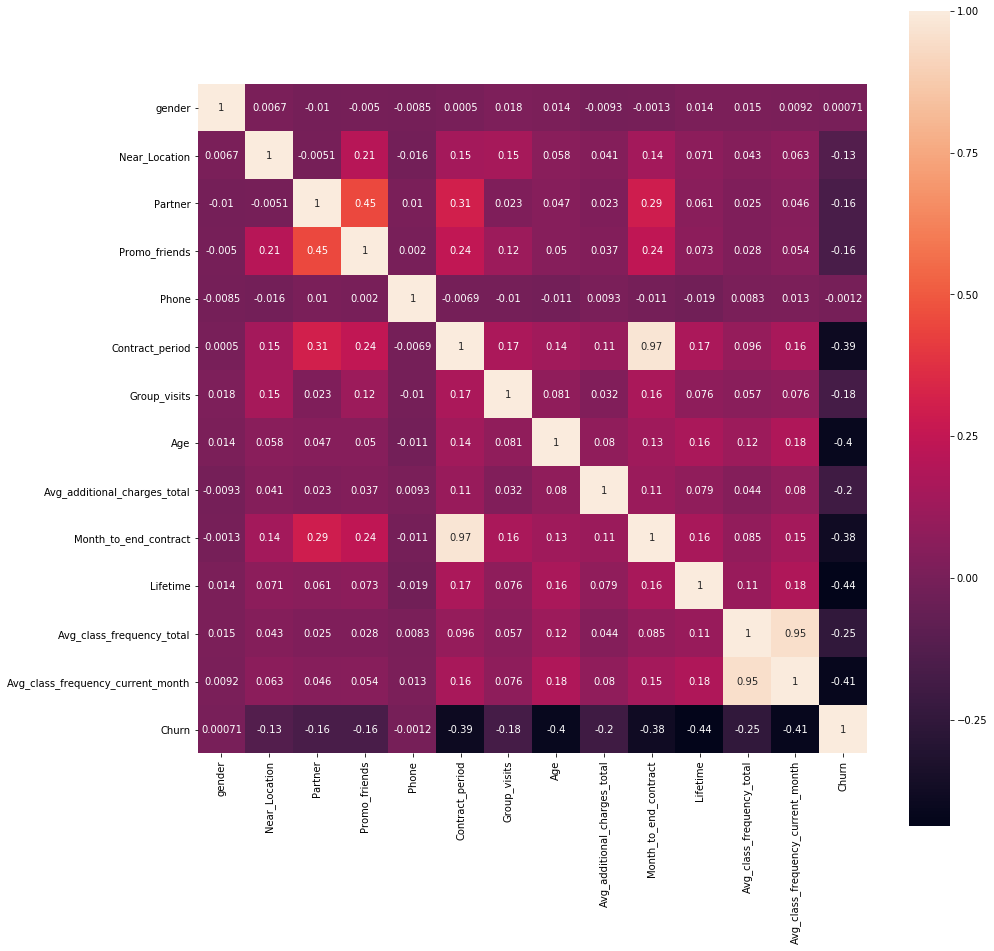

In [11]:
corr_m = gym_churn.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_m,square = True,annot = True)

По матрице корреляции видно, что у пар признаков 'Contract_period' и 'Month_to_end_contract', 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month' есть большая корреляция (что не удивительно).Удалим по одному столбцу из пары. 

In [12]:
gym_churn = gym_churn.drop(['Month_to_end_contract','Avg_class_frequency_current_month'],axis=1)

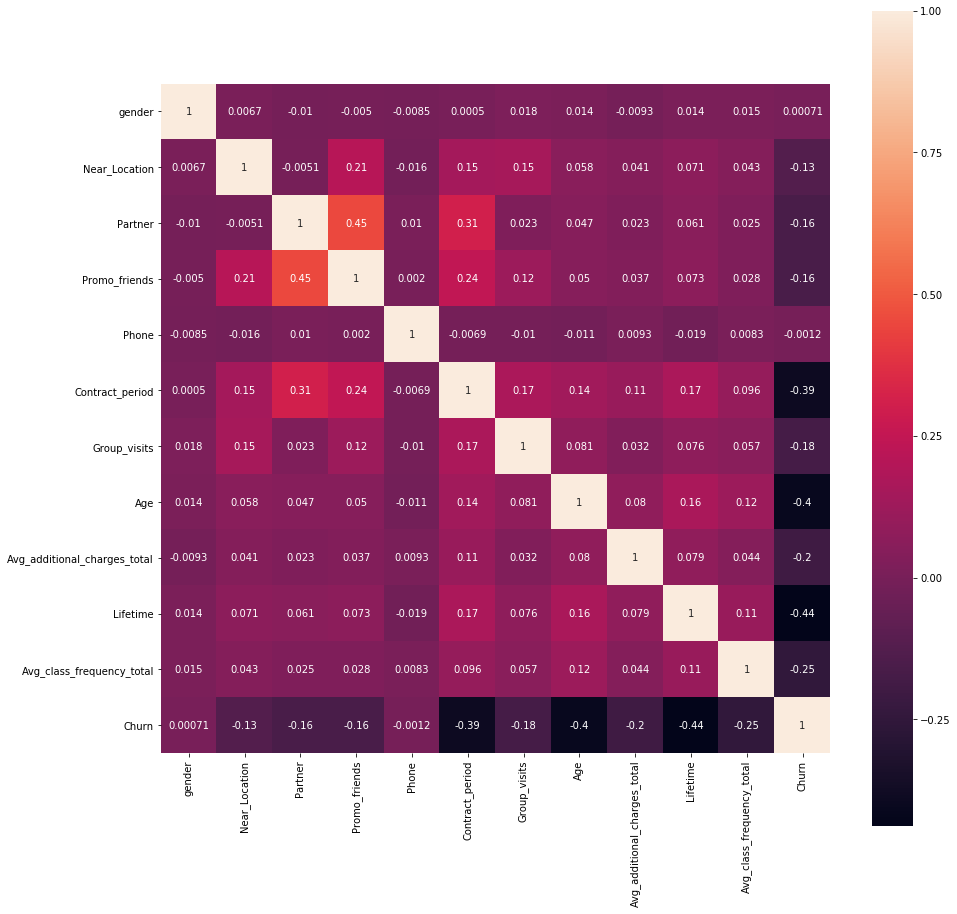

In [13]:
corr_m = gym_churn.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_m,square = True,annot = True)

**Заключение по разделу** В этом разделе был произведен обзор файла, предоставленного менеджерами «Культуриста-датасаентиста».
По предоставленным данным были построены сравнительные гистограммы и матрица корреляции. Для исключения мультиколлинеарности удалены 2 столбца.

## Выбор и сравнение моделей прогнозирования оттока клиентов

Подготовм признаки (матрица X) и целевую переменную (y) и поделим модель на обучающую и валидационную выборку

In [14]:
X = gym_churn.drop('Churn', axis = 1)
y = gym_churn['Churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify = y)

Так как в исходном файле имеем большой разброс стандартных отклонений, признаки  стандартизуем и преобразуем 

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Обучим и сделаем прогноз, используя алгоритм LogisticRegression 

In [17]:
model_1 = LogisticRegression(solver='liblinear',random_state = 0) 
model_1.fit(X_train_st, y_train) 
predictions_1 = model_1.predict(X_test_st)

Обучим и сделаем прогноз, используя алгоритм RandomForestClassifier 

In [18]:
model_2 = RandomForestClassifier(n_estimators = 100,random_state = 0) 
model_2.fit(X_train_st, y_train)
predictions_2 = model_2.predict(X_test_st)

Посчитаем метрики и сравним

In [19]:
print('Accuracy_1: {:.2f}'.format(accuracy_score(y_test,predictions_1)))
print('Accuracy_2: {:.2f}'.format(accuracy_score(y_test,predictions_2)))
print('Precision_1: {:.2f}'.format(precision_score (y_test,predictions_1)))
print('Precision_2: {:.2f}'.format(precision_score (y_test,predictions_2)))
print('Recall_1: {:.2f}'.format(recall_score (y_test,predictions_1)))
print('Recall_2: {:.2f}'.format(recall_score (y_test,predictions_2)))


Accuracy_1: 0.91
Accuracy_2: 0.89
Precision_1: 0.83
Precision_2: 0.81
Recall_1: 0.83
Recall_2: 0.79


Судя по получившимся результатам, первый (LogisticRegression) вариант  лучше.   

**Заключение по разделу** В этом разделе был расчитан прогноз оттока по двум моделям. Осуществлен  выбор модели LogisticRegression как более перспективной  для данной задачи

## Кластеризация клиентов

Стандартизируем данные

In [20]:
sc = StandardScaler()
x_sc = sc.fit_transform(gym_churn.drop(columns = 'Churn'))

Создадим таблицу связок признаков по алгоритму иерархической агломеративной кластеризации

In [21]:
linked = linkage(x_sc, method = 'ward')

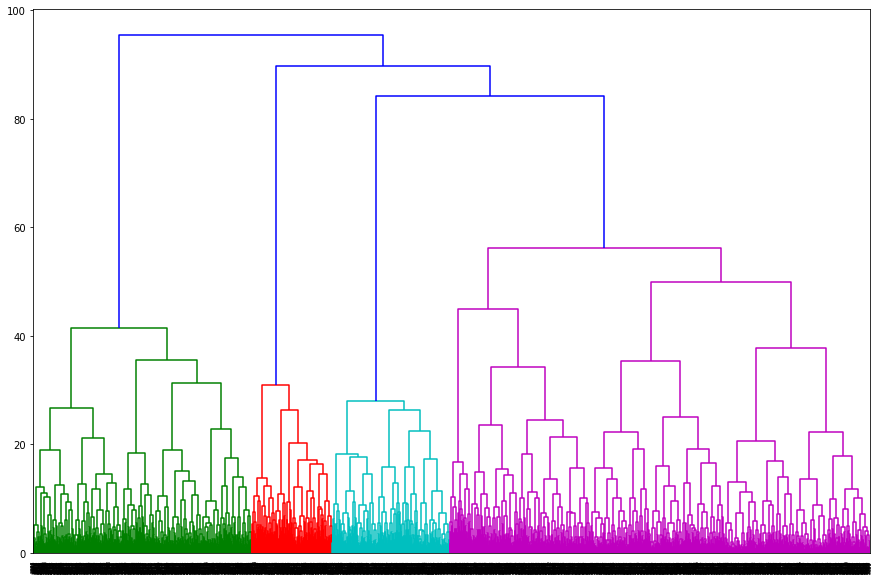

In [22]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Применим алгоритм KMeans и сформируем вектор кластеров с рекомендованным n=5

In [23]:
km = KMeans(n_clusters = 5,random_state = 0) 
labels = km.fit_predict(x_sc)
gym_churn['cluster_km'] = labels

Получим средние значения признаков по кластерам

In [24]:
gym_cluster = gym_churn.pivot_table(index='cluster_km',values=['gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age','Avg_additional_charges_total','Lifetime','Avg_class_frequency_total','Churn']).round(2)
gym_cluster.sort_values(by='Churn')

,Age,Avg_additional_charges_total,Avg_class_frequency_total,Churn,Contract_period,Group_visits,Lifetime,Near_Location,Partner,Phone,Promo_friends,gender
cluster_km,,,,,,,,,,,,
1,29.54,155.86,1.98,0.12,7.66,0.46,4.38,1.00,0.96,1,0.89,0.49
3,29.54,148.09,1.94,0.20,4.53,1.00,3.76,1.00,0.25,1,0.08,0.54
4,29.30,144.21,1.85,0.27,4.78,0.43,3.94,0.86,0.47,0,0.31,0.52
2,28.77,143.38,1.80,0.38,2.82,0.00,3.34,1.00,0.24,1,0.06,0.51
0,28.72,137.54,1.77,0.40,3.03,0.24,3.06,0.00,0.49,1,0.08,0.50


Таблица отсортирована по Churn. Самое большое отсеивание в двух нижних строках (кластеры 2 и 0).

5 кластеров распределились следующим образом: в трех отток не превышает 30%, а в двух других отток почти 40%.

По колонкам признаков можно видеть, что в этих кластерах (двух нижних строках) меньше
- возраст, 
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
- средняя частота посещений в неделю за все время с начала действия абонемента
- длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- факт посещения групповых занятий
- время с момента первого обращения в фитнес-центр (в месяцах)


т.е. из 11-ти признаков у 6-ти показатели в среднем меньше, а остальные -не имеют больших отличий. Это 

- проживание или работа в районе, где находится фитнес-центр
- сотрудник компании-партнёра клуба
- наличие контактного телефона
- факт первоначальной записи в рамках акции «приведи друга»
- пол

Посмотрим распределения признаков у 6-ти отличающихся

In [25]:
gym_cluster_0 = gym_churn.query('cluster_km ==0')
gym_cluster_1 = gym_churn.query('cluster_km ==1')
gym_cluster_2 = gym_churn.query('cluster_km ==2')
gym_cluster_3 = gym_churn.query('cluster_km ==3')
gym_cluster_4 = gym_churn.query('cluster_km ==4')


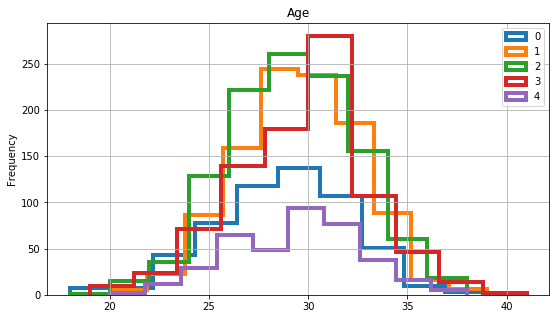

In [26]:
def print_hist(feature):
    ax = gym_cluster_0[feature].plot(
    kind='hist',
    histtype='step',
    figsize = (9,5),
    bins=10,
    linewidth=4,
    label='0',
    legend=True
    )
    gym_cluster_1[feature].plot(
    kind='hist',
    histtype='step',
    figsize = (9,5),
    bins=10,
    linewidth=4,
    label='1',
    ax=ax,
    grid=True,
    legend=True,
    ) 
    gym_cluster_2[feature].plot(
    kind='hist',
    
    histtype='step',
    figsize = (9,5),
    bins=10,
    linewidth=4,
    label='2',
    ax=ax,
    grid=True,
    legend=True,
    ) 
    gym_cluster_3[feature].plot(
    kind='hist',
    histtype='step',
    figsize = (9,5),
    bins=10,
    linewidth=4,
    label='3',
    ax=ax,
    grid=True,
    legend=True,
    ) 
    gym_cluster_4[feature].plot(
    kind='hist',
    histtype='step',
    figsize = (9,5),
    bins=10,
    linewidth=4,
    label='4',
    ax=ax,
    grid=True,
    legend=True,
    title= feature
    ) 
print_hist('Age')

 По признаку 'Age' у 2 и 0 кластера есть сдвиги в сторону меньшего возраста (< 20 лет) в отличие от остальных групп, и  хотя в кластере 3 тоже есть немного молодежи, среднее компенсирует это за счет большой группы старше  30 лет, чего не наблюдается в кластерах 2 и 0.   

In [27]:
gym_churn.query('Age <= 22 & Churn==1')['gender'].count()

59

In [28]:
gym_churn.query('Age >= 35 & Churn==1')['gender'].count()

4

In [29]:
gym_churn.query('Age >= 35')['gender'].count()

189

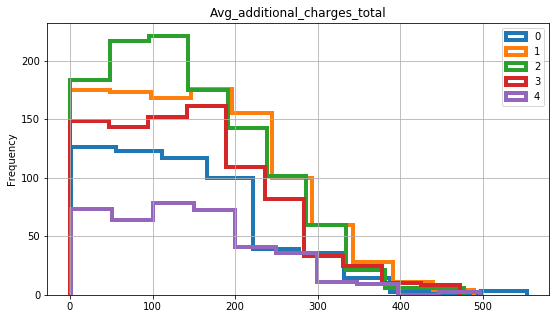

In [30]:
print_hist('Avg_additional_charges_total')

 Здесь  видно, что особо критической разницы не наблюдается, но сумма доп.трат на услуги обратно пропорциональна оттоку, и средняя разница между max и min  - 18.32 или 12%.

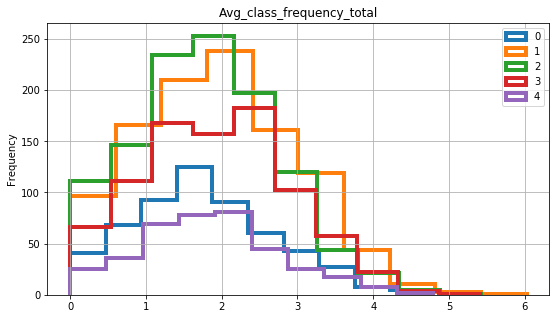

In [31]:
print_hist('Avg_class_frequency_total')

 Средняя частота посещений у 2 и 0 кластеров тоже обратно пропорциональна оттоку. Min отток - 1.98, max - 1.77 раз в неделю.

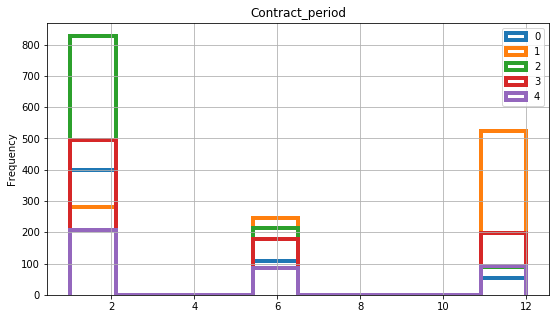

In [32]:
print_hist('Contract_period')

Здесь четко видно, что у 2 и 0 кластеров короче срок абонемента.

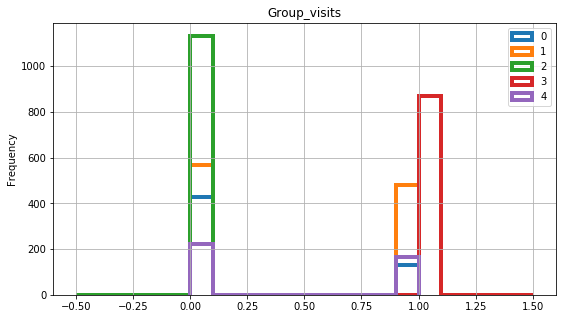

In [33]:
print_hist('Group_visits')

По этому признаку видно, что  у 2 и 0 кластеров посещаемость значительно меньше, чем у остальных, не более 30% в кластере 0 и полный отказ в кластере 2.  

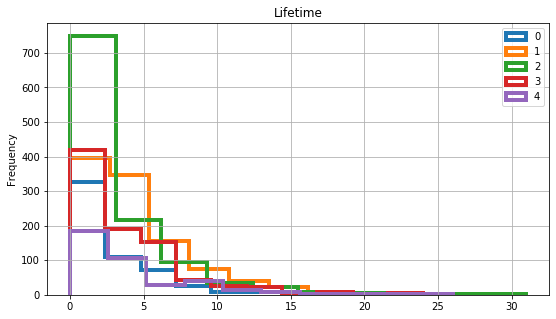

In [34]:
print_hist('Lifetime')

По этому графику видно, что в этих "проблемных"(2 и 0) группах большая доля "новичков".

In [35]:
gym_churn.query('Lifetime == 1 & Churn==1')['gender'].count()

414

In [36]:
gym_churn.query('Lifetime == 1 ')['gender'].count()

843

Contract_period


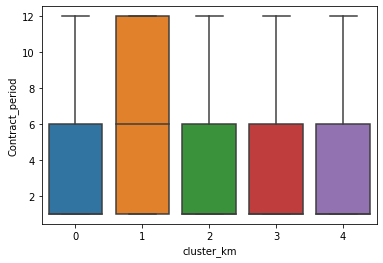

Age


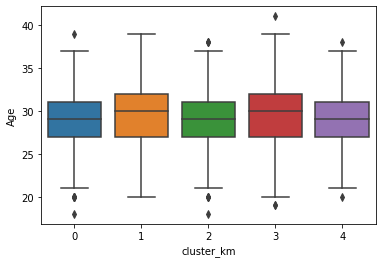

Avg_additional_charges_total


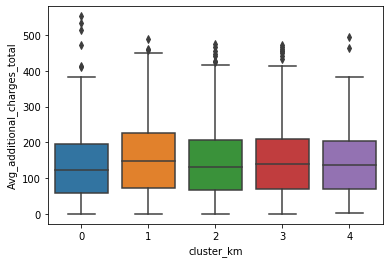

Lifetime


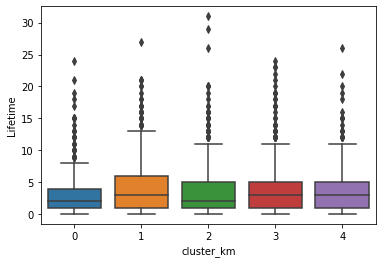

Avg_class_frequency_total


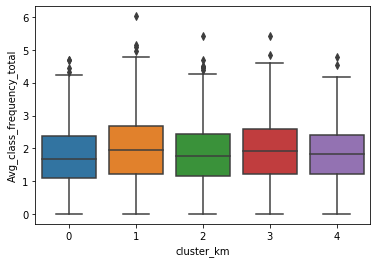

In [37]:
gym1=['Contract_period','Age','Avg_additional_charges_total','Lifetime','Avg_class_frequency_total']
for feature in gym1:
    print(feature)
    sns.boxplot(x ='cluster_km',y = feature, data = gym_churn)
    plt.show()

gender


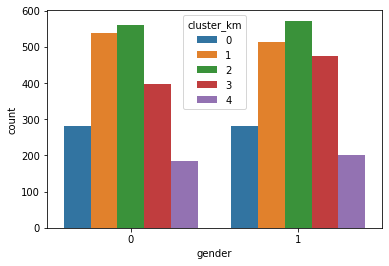

Near_Location


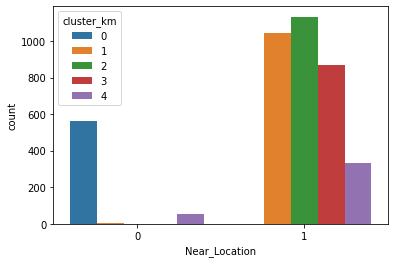

Partner


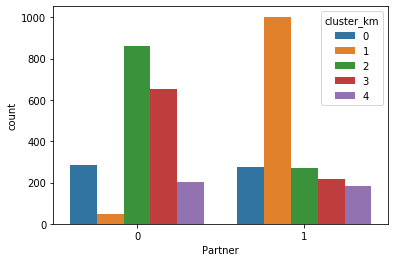

Promo_friends


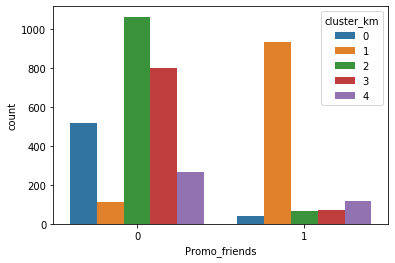

Phone


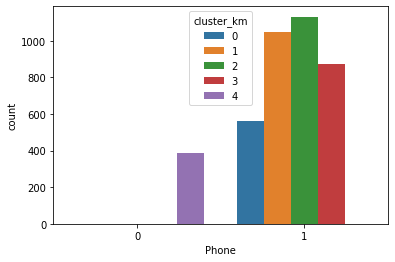

Group_visits


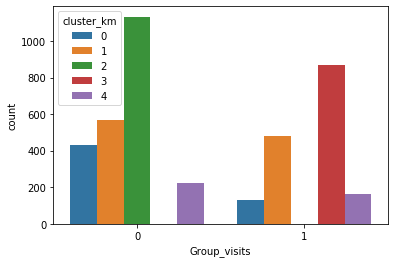

In [38]:
gym2=['gender','Near_Location','Partner','Promo_friends','Phone','Group_visits']
for feature in gym2:
    print(feature)
    sns.countplot(data = gym_churn, x = feature, hue = 'cluster_km')
    plt.show()

Для каждого полученного кластера посчитаем долю оттока (методом groupby())(Это по заданию, хотя они уже посчитаны ранее в сводной таблице)

In [39]:
gym_churn.groupby('cluster_km').agg({'Churn': 'mean'}).round(2)

,Churn
cluster_km,
0,0.40
1,0.12
2,0.38
3,0.20
4,0.27


**Заключение по разделу**В этом разделе все посетители были поделены на 5 групп по схожим признакам.В группах с большим оттоком были выделены 6 признаков кардинально отличающиеся (все в меньшую сторону) от других групп.По ним были построены гистограмы для более детального рассмотрения причин оттока. Под каждой гистограммой даны комментарии. Также сделана визуализация по всем признакам.

## Общий вывод и рекомендации

### Результаты

- В процессе анализа файла были рассмотрены данные 13 параметров-признаков. Были построены графики сравнения их показателей для оставшихся и ушедших посетителей. 
- Была построена матрица корреляции признаков и из файла удалены 2 признака с корреляциями 0.95 и 0.97 для исключения мультиколлине-арности.
- Были опробованы 2 модели для расчета прогноза оттока. Перед расчетом исходные данные были стандартизированы.Лучшей признана модель LogisticRegression.
- Была произведена кластеризация файла посетителей. Было сформировано 5 кластеров. В трех из них отток не превышает 30%, а в двух других отток 38% и 40%. Были выявлены 6 признаков максимально влияющих на цель нашего исследования. Это
   *  возраст
   * суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
   * средняя частота посещений в неделю за все время с начала действия абонемента
   * длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
   * факт посещения групповых занятий
   * время с момента первого обращения в фитнес-центр (в месяцах)
- Для этих шести признаков были построены гистограммы  с отражением показателей по каждому кластеру.  
- Для всех признаков сделана визуализация

### Рекомендации

Из нашего анализа следует, что
- необходимо обратить внимание на "новичков", как правило, они берут пробный абонемент на краткий период. Из всех "новичков" (20% от общей численности) 49% не остаются на следующий месяц, и они же имеют самые низкие показатели по групповым занятиям.
- необходимо обратить внимание на молодежь студенческого возраста.Хотя среди посетителей их меньше 2%, но отток у них почти 80%.
- рекомендуется расширить предложения по групповым занятиям, особенно с учетом запросов самых молодых посетителей. Как показывает исследование, те, кто уйдут, значительно меньше посещают групповые занятия, не более 24% против 43-100% остающихся. Значит их не устраивает либо график, либо направление. 
- рекомендуется для всех "новичков" недели через 2 после начала действия абонемента провести анкетирование с вопросами, что нравится и нет,  и пожеланиями, что хотелось бы добавить или исправить. Чтобы к концу месяца успеть сделать коррекцию предложений. 